### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats

#Distributions
from scipy.stats import binom # discerete rand var (.pmf)
from scipy.stats import norm # continous rand var (.pdf), cumulative(.cdf), inverse(.ppf)
from scipy.stats import poisson #discrete rand var (.pmf)
from scipy.stats import geom
from scipy.stats import expon

# Student's T-Test
from scipy.stats import t #T-test --> .ppf (Get critical T value), .cdf(Get calulcated T-value)
from scipy.stats import ttest_1samp # for 1 sample T-Test --> dataframe/list/array
from scipy.stats import ttest_ind # for 2 sample independent T-tests --> dataframe/list/array
from scipy.stats import ttest_rel # for 2 sample dependent T-tests --> dataframe/list/array
from scipy.stats import ttest_ind_from_stats # for 2 sample independent T-test for given values

#KS Test
from scipy.stats import kstest #goodness of fit
from scipy.stats import ks_1samp 
from scipy.stats import ks_2samp

#Chi2 Testing
from scipy.stats import chisquare #chi2 test for "goodness of fit" and "independence" between dataframe/list/array 
from scipy.stats import chi2_contingency #chi2 test given contigency table => pd.crosstab(, margins = False)
from scipy.stats import chi2 #continous dist. rvs(generate rand.var), ppf (percent point function), pdf, cdf(test_stat, df, mean, std)

#ANOVA & Kruskal-Wallis H Test
from scipy.stats import f #continous random variable
from scipy.stats import f_oneway #paramteric
from scipy.stats import kruskal #non-paramteric form of one-way annova

#Tests for equality of variance (Homogeneity of Variance)
from scipy.stats import bartlett #More stricter check for variances. Useful for samples from nearly normal pop
from scipy.stats import levene #For samples from significantly non-normal populations

# Tests for Normality
from scipy.stats import shapiro #Shapiro Wilk Test 
from scipy.stats import normaltest # D’Agostino and Pearson’s K2 Test

# Goodness of fit --> chi2, KS, Anderson Darling, Cramer-von Mises
# from scipy.stats import goodness_of_fit #(dist, data, statistic = {“ad”, “ks”, “cvm”}) --> Monte Carlo
from scipy.stats import anderson_ksamp #Anderson-Darling test for goodness of fit for one sample 

# Correlation
from scipy.stats import pearsonr
from scipy.stats import spearmanr

### Links

1. https://www.scribbr.com/statistics/confidence-interval/
2. https://www.investopedia.com/terms/n/null_hypothesis.asp#:~:text=The%20null%20hypothesis%20assumes%20that,zero%20is%20due%20to%20chance. (Check related terms)
3. https://www.scribbr.com/statistics/null-and-alternative-hypotheses/
4. (Big Question) https://rstudio-pubs-static.s3.amazonaws.com/793612_fb4c0b56f7144615ae99e17142853b46.html
5. http://www.csun.edu/~an73773/HT1Ans.pdf (Multiple real life questions)
6. https://stats.stackexchange.com/questions/208517/kolmogorov-smirnov-test-vs-t-test (KS Test vs T-Test)
7. https://stats.stackexchange.com/questions/92141/pp-plots-vs-qq-plots (ProbPlot(PP) vs Quantile-Quantile(QQ) plot)

[TO - READ: ](https://www.listendata.com/2019/07/KS-Statistics-Python.html)
<br>[ANOVA](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/anova/#ANOVA)
<br> [ANOVA in detail](https://www.tibco.com/reference-center/what-is-analysis-of-variance-anova#:~:text=Analysis%20of%20Variance%20(ANOVA)%20is,the%20means%20of%20different%20groups.)
<br>[1 way v/s 2 way ANOVA](https://www.technologynetworks.com/informatics/articles/one-way-vs-two-way-anova-definition-differences-assumptions-and-hypotheses-306553)
<br> [chi2 v/s ANOVA](https://www.statology.org/chi-square-vs-anova/)
<br> [ANOVA v/s T-Test](https://www.wallstreetmojo.com/anova-vs-t-test/)
<br> [KS, SW and AD test for normality](https://towardsdatascience.com/choose-the-appropriate-normality-test-d53146ca1f1c)
<br> [QQ plots explained](https://towardsdatascience.com/q-q-plots-explained-5aa8495426c0)
<br> [QQ plots alt resource](https://www.ucd.ie/ecomodel/Resources/QQplots_WebVersion.html)
<br> [Kruskal Wallis Test in detail](https://towardsdatascience.com/kruskal-wallis-test-for-beginners-4fe9b0333b31)

<b> Q. Family has 2 children, atleast one child is a girl. What is the probability that P(both are girls) </b>

In [38]:
num_families = int(10_000)
num_families

10000

In [9]:
arr = np.random.choice(["B", "G"], size = num_families)
prob_B = len(arr[arr == "B"]) / (len(arr))
prob_B

0.5023

In [53]:
outcomes = []

for i in range(0, num_families):
    child_1 = np.random.choice(["B", "G"])
    child_2 = np.random.choice(["B", "G"])
    outcomes.append([child_1, child_2])

outcomes = np.asarray(outcomes)
prob_atleast_one_girl = len(outcomes[np.isin(outcomes, "G")]) / len(outcomes)
prob_both_girls = len(outcomes[np.isin(outcomes, ["G", "G"])]) / len(outcomes)
print(prob_atleast_one_girl, prob_both_girls)

0.9944 0.9944


In [143]:
sachin = pd.read_csv("Sachin_ODI.csv")
sachin.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


In [4]:
#The Probability of losing and not scoring a century --> 0.444
sachin[["Won", "century"]].value_counts(normalize=True)

Won    century
False  False      0.444444
True   False      0.427778
       True       0.083333
False  True       0.044444
dtype: float64

In [5]:
#The Probability of losing or not scoring a century
P_losing = len(sachin[sachin["Won"] == False]) / sachin.shape[0]
P_no_century = len(sachin[sachin["century"] == False]) / sachin.shape[0]

print(P_losing + P_no_century - 0.444) #subtracting intersection

0.9171111111111112


In [8]:
# The probability of scoring century given that the opposition is South Africa.
# The probability that the opposition is South Africa given that he scored a century.

P_Opp_Safrica = len(sachin[sachin["Opp"] == "South Africa"]) / len(sachin["Opp"])
P_century_and_Safrica = len(sachin[(sachin["Opp"] == "South Africa") & (sachin["century"]) == True]) / len(sachin.index)
ans1 = P_century_and_Safrica / P_Opp_Safrica

P_Century = len(sachin[sachin["century"] == True]) / sachin.shape[0]
ans2 = P_century_and_Safrica / P_Century

print(ans1, ans2)

0.11363636363636363 0.10869565217391304


In [56]:
# ALT TO ABOVE QUESTION
pd.crosstab(index = sachin["century"], columns = (sachin["Opp"] == "South Africa"), margins = True)

Opp,False,True,All
century,,,
False,275,39,314
True,41,5,46
All,316,44,360


The covid.csv contains details of whether a patient was given a medicine (m1) or not, and whether the patient survived (s) or not.

Calculate the following using the above given dataset <br>
1.) P[m1 and s] <br>
2.) P[m1 | s] <br>
3.) P[s | m1] <br>

In [ ]:
covid = pd.read_csv("covid.csv")
covid.columns = ["medicine", "survived"]
covid = covid.astype("bool")

In [58]:
pd.crosstab(covid['medicine'],covid['survived'],margins=True)

survived,False,True,All
medicine,,,
False,295,605,900
True,5,95,100
All,300,700,1000


In [37]:
import scipy.stats as scistats

arr = [4000] * 5
arr.extend([18000] * 2)
arr = np.asarray(arr)
print(arr)
print(arr.mean(), np.quantile(arr, 0.5), scistats.mode(arr))

[ 4000  4000  4000  4000  4000 18000 18000]
8000.0 4000.0 ModeResult(mode=array([4000]), count=array([5]))


In [30]:
temp_cel = np.array([[27, 24, 25, 26, 25, 27, 28, 23, 25]])
temp.sort()
temp_farh = 1.8*temp_cel + 32
print(round(np.var(temp_cel), 3), round(np.var(temp_farh), 3))

2.247 7.28


<h3><u> Binomial Distribution </h3></u>

<b> Q. </b> Given 4 red balls and 2 blue balls. A can take out 4 balls (with repitition). If A gets 4 reds he gets $150, else he loses 10. Will A go home richer?


In [107]:
import seaborn as sns

<AxesSubplot:ylabel='count'>

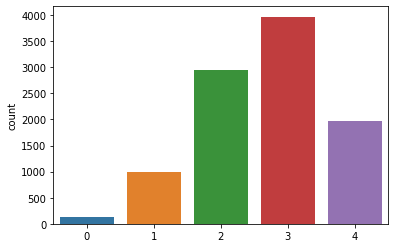

In [109]:
num_reds = []
num_expt = 10_000

for i in range(0, num_expt):
    ss = ["r", "r", "r", "r", "b", "b"]
    expt = np.random.choice(ss, 4)
    num_red = np.count_nonzero(expt == "r")
    num_reds.append(num_red)

num_reds = np.asarray(num_reds, dtype = "int32")
sns.countplot(x = num_reds)

In [83]:
p0 = len(num_reds[num_reds == 0]) / num_expt
p1 = len(num_reds[num_reds == 1]) / num_expt
p2 = len(num_reds[num_reds == 2]) / num_expt
p3 = len(num_reds[num_reds == 3]) / num_expt
p4 = len(num_reds[num_reds == 4]) / num_expt
# print(len(num_reds[num_reds == 0]))
# print(len(num_reds[num_reds == 1]))
# print(len(num_reds[num_reds == 2]))
# print(len(num_reds[num_reds == 3]))
# print(p0, p1, p2, p3, p4, p0+p1+p2+p3+p4)


print(f"Probability of getting exactly 4 red balls in 4 tries (repetition) =" , p4,  
      "\nProbability of NOT getting exactly 4 red balls  = ", 1-p4)

losses = len(num_reds[np.isin(num_reds, [0, 1, 2, 3])]) * -10
wins = len(num_reds[num_reds == 4]) * 150
print("Wins = ", wins)
print("Losses = ", losses)
print("Wins + Losses = ", wins + losses)

Probability of getting exactly 4 red balls in 4 tries (repetition) = 0.1958 
Probability of NOT getting exactly 4 red balls  =  0.8042
Wins =  293700
Losses =  -80420
Wins + Losses =  213280


<b> Theoretical Approach </b>

In [84]:
import math

# P(getting exactly 4 red balls from 4 red and 2 blue balls -- with repetition)
# P(T) = (4C1 * 4C1 * 4C1 * 4C1) / 6C4

p = (math.comb(4, 1))**4 / (6**4)

print(f"Probability of getting exactly 4 red balls in 4 tries (repition) =" , p,  
      "\nProbability of NOT getting exactly 4 red balls  = ", 1-p)
print("Wins = ", p*150)
print("Losses = ", (1-p)*-10)
print("Wins + Losses = ", p*150 + (1-p)*-10)

Probability of getting exactly 4 red balls in 4 tries (repition) = 0.19753086419753085 
Probability of NOT getting exactly 4 red balls  =  0.8024691358024691
Wins =  29.629629629629626
Losses =  -8.024691358024691
Wins + Losses =  21.604938271604937


<b> Scipy has a great library to simulate binomial distributions </b>

In [110]:
from scipy.stats import binom
import math

n = 5
k = 3
p = 0.6

for k in range(6):
    print(f"k = {k}, p = ", binom.pmf(k=k, n=n, p=p))

k = 0, p =  0.010240000000000003
k = 1, p =  0.0768
k = 2, p =  0.23040000000000002
k = 3, p =  0.3455999999999997
k = 4, p =  0.2592000000000001
k = 5, p =  0.07775999999999998


In [86]:
import math
p = math.comb(5, 3) * (0.6)**3 * (0.4)**2
print(p)

0.3456


<b> Q. </b> Suppose we toss 10 biased coin every 1 min with P(head) = 0.002778
<br> 1. Probability of getting 1 head in 90 mins
<br> 2. Expected number of heads in 90 mins

In [124]:
print("Probability of getting exactly 1 head in 90 mins: ", binom.pmf(k = 1, n = 10 * 90, p = 0.002778))
print("Expected number of heads 90 mins: ", binom.expect(args = (10 * 90, 0.002778)))

Probability of getting exactly 1 head in 90 mins:  0.2050448325604843
Expected number of heads 90 mins:  2.5002


<b> Poisson Approximation to Binomial Distribution </b>
<br> If for binomial distribution, n >= 30 and p <= 0.05 then we can approximate :
<br> binom.pmf(k, n, p) = poisson.pmf(k, mu = np)

Let's take above question and try to compute the answer using Poisson 

In [131]:
from scipy.stats import poisson

print("Probability of getting exactly 1 head in 90 mins: ", poisson.pmf(k = 1, mu = 10 * 90 * 0.002778))
print("Expected number of heads 90 mins: ", poisson.expect(args = (10*90*0.002778, )))

Probability of getting exactly 1 head in 90 mins:  0.20518787188106452
Expected number of heads 90 mins:  2.5001999999999995


<h3><u> Gaussian Distribution </h3></u>
<br> <b> Normal Distribution = Gaussian Distrubution with mean = 0 and std.dev = 1 </b>
<br> In normal and gaussian distribution, mean = median= mode and it will be symmetric.
<br> Symmetric means that, norm.cdf(x) + norm.cdf(-x) = 1

In [8]:
norm.cdf(2.5) + norm.cdf(-2.5)

1.0

In [3]:
from scipy.stats import norm

z_score = (70-65)/2.5
print(norm.cdf(z_score))

0.9772498680518208


In [5]:
norm.cdf(0.5)

0.6914624612740131

In [61]:
(1 - norm.cdf(1.5)) * 2

0.13361440253771617

In [4]:
fraction = 0.9
norm.ppf(fraction) # Percent Point function - inverse of the cdf

1.2815515655446004

In [5]:
(norm.ppf(fraction) * 13.1) + 119

135.78832550863427

<h3><u>Poisson Distribution </h3></u>

In [17]:
from scipy.stats import poisson

poisson.pmf(k = 0, mu = 3) + poisson.pmf(k = 1, mu = 3)

0.1991482734714558

Football WC matches have avg 2.5 goal in @ 90 mins
<br> <b> Q. </b> P(having 1 goal in 30 mins)
<br> <b> Q. </b> P(having 1 goal in 90 mins)
<br> <b> Hint: </b> Both are asking for "exactly" one goal so we will use pmf(probability mass function) and not cdf(cumulative distribution function)

In [98]:
print(poisson.pmf(k=1, mu = (2.5 * 30 / 90)))
print(poisson.pmf(k=1, mu = (2.5 * 90 / 90)))

0.3621651737558985
0.205212496559747


<b> Q. </b> A shop is open for 8 hours. Average number of customers during that period is 74 - Poisson Distributed. 

1) What is the probability that in 2 hours, there will be at most 15 customers?
<br> 2) What is the probability that in 2 hours, there will be at least 7 customers in the shop?

In [134]:
cust = 74
hours = 8
mu = cust / hours #average/rate
mu

9.25

In [135]:
#Part - 1, calulcating avg rate for 2 hrs
poisson.cdf(k = 15, mu = mu * 2)

0.24902769151284776

In [137]:
#Part - 2, two approaches, same result
print((1 - poisson.cdf(k = 7, mu = mu * 2)) + poisson.pmf(k = 7, mu = mu * 2))
print(1 - poisson.cdf(k = 6, mu = mu * 2))

0.9992622541111789
0.9992622541111789


<b> Q. </b> A person received 240 messages per hour on average

<ol>
    <li> Approx how many messages is he recieving in 10 seconds? </li>
    <li> Probability of getting 1 message in 30 seconds </li>
    <li> Probability of getting no message in 15 seconds </li>
    <li> What is the probability of waiting for less than or equal to 10 seconds for getting a message </li>
    <li> Probability of waiting for more than 10 seconds to recieve a message </li>
</ol>

<b> Hints </b>
<br> For Q.4, p(waiting for less than or equal to 10 seconds for getting a message) == p(getting exactly 1 message in atmost 10 seconds)
<br> For Q.5, p(waiting more than 10 secs to receive a message) == p(recieving no messages in 10 secs)

In [142]:
240 * 10 /3600

0.6666666666666666

In [138]:
poisson.pmf(k = 2, mu = (240/3600) * 30)

0.2706705664732254

In [139]:
poisson.pmf(k = 0, mu = (240/3600) * 15)

0.36787944117144233

In [140]:
poisson.cdf(k = 1, mu = (240/3600) * 10)

0.8556951983876534

In [103]:
1 - poisson.pmf(k=0, mu = (240 * 10/3600))

0.486582880967408

In [22]:
print(poisson.cdf(k = 1, mu = mu_1) - poisson.cdf(k = 0, mu = mu_1))
print(poisson.pmf(k=1, mu = mu_1))

0.27067056647322524
0.2706705664732254


In [23]:
poisson.cdf(k=1, mu = (3/20))

0.9898141728888165

In [35]:
poisson.pmf(k=3, mu = mu_1)

0.10413714098399081

<h3> <u> Geometric Distribution </h3></u>

<b> Q. </b> Given a dice, probability that I get a 6 after exactly 1 try

In [44]:
from scipy.stats import geom
geom.pmf(k = 1, p = 1/6)

0.16666666666666666

<b> Q. </b> Probability that in a dice we get 6 after <b> atleast </b> 3 tries

In [46]:
print(1 - geom.cdf(k = 2, p = 1/6))
print(1 - geom.cdf(k = 3, p = 1/6) + geom.pmf(k = 3, p = 1/6))

0.6944444444444444
0.6944444444444444


In [51]:
p_win = 0.7
geom.pmf(k = 4, p = p_win)

0.018900000000000007

<b> Q. </b> During a pandemic, a pharmaceutical company was able to successfully engineer a drug to be able to fight the virus. 
But, the probability of manufacturing the drug successfully was 40% on each independent production process.
Based on this data, what would be the probability of successfully manufacturing the drug 
in less than 7 production processes?
<br><b> Ans. </b>
<br>Less than 7 = P(1 --> 6) = P (<=6) = P(atmost 6). Therefore, this is a simple geometric distribution calc

In [47]:
from scipy.stats import geom
p = 0.4
geom.cdf(k = 6, p = 0.4)

0.953344

<b> Q. </b> Given probability of winning a prize = 0.7, find P(I don't win in the first 2 attempts)
<br><b> Ans. </b>
<br> P(don't win in first 2) == P(lose in first 2)
We don't care about what happens after the first 2 attempts, we can win or can't win
<br> <b> OR </b>
<br> k = 3 (atleast 3 tries before I win the prize) = 1 - atmost 2 tries before I win the prize = (1 - k<=2)

In [41]:
print(0.3 * 0.3)
print(1 - geom.cdf(k = 2, p = 0.7))

0.09
0.08999999999999997


<b> Q. </b>
You are drawing from a random variable that is normally distributed, X~ N(0, 1), once a day.
Approximately what is the expected number of days you have to draw until you get a value greater than 2?

<b> Ans. </b>
First we need to find probability of getting a value greater than 2 in the normally distributed curve. Curve has mean = 0 and std.dev = 1, so a score of greater than 2 is two std.deviations away from mean. 
<br> Therefore, Z-score = 2
<br> After getting probability, we will use Expectation value formula = 1/p

In [35]:
mean = 0
std_dev = 1
# Approximately what is the expected number times you have to draw until you get a value greater than 2?
# Therefore, +2 standard deviations --> 97.5%
# So, value greater than 2 means probability => 1 - 0.977
print(norm.cdf(2))
p = 1 - norm.cdf(2)
1 / p

0.9772498680518208


43.95578901598566

<h3> Exponential and Log Normal Distributions </h3>

Both these distrubutions are basically tranformations which help convert data to normal distributions
In Log Normal Distribution, we assume that the data is exponentially distributed, so we take its log and convert it to a normal distribution

Exponential Distrbution: P(x) =$1 - e^{-x/μ}$
<br>LogNormal Distrbution: P(x) = $ln(x)$
<br> Variance of LogNormal Distribution = $(e^{2μ + σ^{2}}) * (e^{σ^{2}} - 1)$

**Q.** The amount of money customers spend in one trip to the supermarket follows an exponential distribution with a mean amount of Rs 1000. If a customer has Rs 600 in the wallet, what is the probability that the customer will need more money?

In [11]:
mu = 1000
x = 600

1 - expon.cdf(x = x, scale = mu)

0.5488116360940265

**Q.** Sales delay is the elapsed time between the manufacture of a product and it’s sale. It is quite common for investigators to model sales delay using a lognormal distribution. For a particular product, the distribution with the following parameter values is proposed : μ = 2.05 and variance = 0.08 (here the unit for delay is months).

1. What is the standard deviation of delay time ?
2. What is the probability that delay time exceeds 10 months?

In [38]:
import math 

mu = 2.05
var = 0.08 #variance = sigma^2

log_var = math.exp(2*mu + var) * (math.exp(var) - 1)
std_dev = math.sqrt(log_var)
print(std_dev)

#Since distrbution is log-normal, log of the values will follow normal distribution
z_score = (math.log(10) - mu) / std_dev
p_10 = 1 - norm.cdf(z_score)
print(p_10)

2.3332660028952237
0.45689715381821294
2.302585092994046


<b> Q. </b> On average, a customer care executive takes about 5 minutes to solve the issue of any customer. It is known that the time taken follows an exponential distribution.
Find the probability that an executive spends 4 to 5 minutes with any randomly selected customer.

<b> Ans: </b>
Given that
<br> μ = 5
<br> So, λ = 1/5
<br> Now, the probability of spending 4 to 5 mins with any randomly selected customer is P(4 < X < 5)

In [9]:
from scipy.stats import expon

mu = 5

p4 = expon.cdf(x = 4, scale = mu) # The probability of spending 4 mins
p5 = expon.cdf(x = 5, scale = mu) # The probability of spending 5 mins
print(p5 - p4)

0.08144952294577923


**Q.** The average life span of an Electronic Gadget is 2 years. If the number of years the gadget works, be a random variable that follows an exponential distribution. Find the probability that :

1. It will work at least for 6 years.
2. It will work at most for 6 years.

In [19]:
mu = 2 

p1 = 1 - expon.cdf(x = 5, scale = mu)
p1_alt = 1 - expon.cdf(x = 6, scale = mu) + expon.pdf(x = 6, scale = mu)
p2 = expon.cdf(x = 6, scale = mu)

print(p1, p1_alt)
print(p2)

0.08208499862389884 0.07468060255179593
0.950212931632136


**Q.** On average, a pair of running shoes can last 6 months if used every day. The length of time running shoes last is exponentially distributed. If the pair has already lasted 5 months, find the probability that it will last a total of over 9 months.

**Ans:** Given: The shoes have already lasted 5 months
<br> To find: P(last over 9 months)

We need to find P(T>9| T>5)

Using memoryless property,i.e. P(X>x+a | X>a) = P(X>x)
<br> P(T>9| T>5) = P(T>4)
<br> P(T>4) = 1 - P(T<4)

<br> $P(9mos/5mos) = \frac{P(9mos \cap 5mos)}{P(5mos)}$

In [17]:
mu = 6

p_over_9 = 1- expon.cdf(x = 9, scale = mu) 
p_5 = expon.cdf(x = 5, scale = mu) 
p_over_9/p_5

0.39463999496581564

<h3><u> CLT and Confidence Interval </u></h3>

<b> Q. </b> Samples of size 100 are selected from a population with a mean of 37 and a standard deviation of 12.The standard error of the sampling distribution of sample means is :

In [149]:
12 / math.sqrt(100)

1.2

<b> Q. </b> The life of LED light bulbs manufactured in a factory is normally distributed with a mean equal to 900 hours and a standard deviation of 50 hours. Find the probability that a random sample of 20 bulbs will have an average life of less than 875 hours.

<b> Ans. </b>
Given : n = 20, dev = 50, mean = 900, xi = 875. First we need to get the sample standard deviation (which is equal to standard error). Then use it go get Z-score and find area under the curve at Z-score

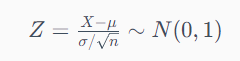

In [154]:
z_score = (875 - 900)/(50 / math.sqrt(20))
norm.cdf(z_score)

0.012673659338734126

<b> Q. </b> The tip percentage for a delivery person has a mean value of 28% and a standard deviation of 7%. What is the probability that the sample mean tip percentage for a random sample of 50 bills is between 26% and 31%?

In [157]:
z_score = (31 - 28)/(7 / math.sqrt(50))
p1 = norm.cdf(z_score)
z_score = (26 - 28)/(7 / math.sqrt(50))
p2 = norm.cdf(z_score)
print(p1, p2, "\n", p1 - p2)

0.9987790827898616 0.021675875630431305 
 0.9771032071594303


<b> Q. </b> The first assessment in a statistical class involves computing a short program. If past experience indicates that 30% of all students will make no errors in the program, use an appropriate normal approximation to compute the probability that in a class of 70 students, <b> at least </b> 28 will make no errors.

<b> Ans. </b>
The Central Limit Theorem implies that the binomial distribution is approximately normal with mean **µ = np** and
standard deviation **σ = √( npq )** as the n increases. A specific condition that must be met for the approximation is that **np>5  and nq>5**, the results will be better if they are greater than or equal to 10

In [2]:
n = 70
p = 0.3
q = 0.7
print(n*p, n*q)

21.0 49.0


In [171]:
n = 70
p = 0.3
q = 0.7
mean = 0.3 * 70
dev = math.sqrt(n*p*q)
xi = 28

z_score = (xi - mean)/dev
print(round(1 - norm.cdf(z_score), 3))
print(round(1- binom.cdf(k = 27, n = 70, p = 0.3), 3)) # if they hadn't said use normal approximation then we wouldve used this

0.034
0.048


<b> Q. </b> On taking a sample of 100 fishes, the calculated average length of this species came out to be 24 and the standard deviation came out to be 8.
Your task is to estimate, with 95 percent confidence, the mean length confidence interval of the fishes in the pond.

In [178]:
n = 100
mean = 24
dev = 8

z_score = norm.ppf(0.95)
mean + z_score*(dev / math.sqrt(n))

25.315882901561178

**Q.** An instructor knows from past experience that mean exam score is 77 with std.dev of 15. At present, the instructor is teaching 2 classes of strength 25 and 64 students respectively

1. Find probability that avg test score of class of size 25 lies between 72 and 82
2. Find probability that avg test score of class of 64 lies between 72 and 82

Ans:
<br> P(72 <= mu <= 82) => P(x <=82) - P (x <= 72)  
<br><b> The above formula comes from C.I = X(bar) ± (z)(sigma)/(sqrt(n) </b>

In [3]:
norm.cdf((82 - 77) * np.sqrt(25) /15) - norm.cdf((72 - 77) * np.sqrt(25) /15)

0.9044192954543706

In [4]:
norm.cdf((82 - 77) * np.sqrt(64) /15) - norm.cdf((72 - 77) * np.sqrt(64) /15)

0.9923392388648204

Therefore, we can say with **90.44% confidence** that the avg test score of class with **25 students** lies b/w 72 and 82
<br> We can also say with **99.23% confidence** that the avg test score of class with **64 students** lies b/w 72 and 82

In [10]:
lifetime = [36.1, 40.2, 33.8, 38.5, 42, 35.8, 37, 41, 36.8, 37.2, 33, 36]

ttest_1samp(lifetime, popmean=40, alternative="greater")

Ttest_1sampResult(statistic=-3.4447725963096305, pvalue=0.9972608300353912)

### <u>Hypothesis Testing - 1 Sample</u>

Compared to average, Sachin scores higher when India wins
Hypothesis tests don't give us causaility --> we don't get data on *why* null hyp is being rejected

In [3]:
1 - norm.cdf(3.53)

0.0002077798334806369

**Q.** A french cake shop claims that the average number of pastries they can produce in a day exceeds 500. The average number of pastries produced per day over a 70 day period was found to be 530. Assume that the population standard deviation for the pastries produced per day is 125. Test the claim using a z-test with the critical z-value = 1.64 at the alpha (significance level) = 0.05, and state your interpretation.

**Ans:**
Given:
<br>µ (population) = 500 pasteries 
<br>µ (sample) = 530 pasteries
<br>n (sample) = 70 days
<br>σ (population) = 125
<br> α (LOS) = 0.05

<br> Ho = French cake shop sells <= 500 pasteries per day
<br> Ha = French cake shop seels > 500 pasteries per day (claim) 
<br> **We will use right-tailed test**

In [3]:
mu_pop = 500
mu_sample = 530
n_sample = 70
std_dev = 125
alpha = 0.05

z = (mu_sample - mu_pop)/ (std_dev/math.sqrt(n_sample))
p = 1 - norm.cdf(z)

print("z-score:", round(z, 2))
print("p-value:", round(p, 2))

if (p < alpha):
    print("Null Hyp rejected")
else:
    print("Null Hyp cannot be rejected")

z-score: 2.01
p-value: 0.02
Null Hyp rejected


**Q.** The student hostel office at IIT Madras estimates that each student uses more than 3.5 buckets of water per day. 45 students in a certain wing averaged 3.72 buckets of water per day. Assume that the population standard deviation is 0.7 buckets. What is the **critical sample mean** for this population, assuming a critical z- value of 1.28?
<br>**Note:** The critical sample mean is defined as the mean value for which the z-score is equal to the critical value. Also, round off the final answer to three decimal places.

**Ans:** 
Ho --> Student uses <= 3.5 buckets per day
<br>Ha --> Student uses > 3.5 buckets per day 
<br> Therefore, we will use **right tailed test**

z = (mu_sample - mu_pop)/ (std_dev/math.sqrt(n_sample))
<br> Therefore, to find critical sample mean, z-score = critical z-value
<br> mu_sample = (crit-z) * (std_error) + mu_pop

In [11]:
mu_pop = 3.5
mu_sample = 3.72
n_sample = 45
std_dev = 0.7
crit_z = 1.28

crit_sample_mean = (crit_z * (std_dev / math.sqrt(n_sample))) + mu_pop
round(crit_sample_mean, 3)

3.634

**Q.** A luxury women's clothing store claims that designer grade sarees are sold within 90 days from the day they are introduced in their store. Last month, they sold all 9 sarees in a certain catalogue at an average of 77.4 days spent in the store. The standard deviation of the sample was 29.6 days.
Assuming the time spent in store is normally distributed, test the claim made by the store at an alpha = 0.05

**Ans:** As population std.deviation is not known and "n" is small (9 < 30), we will use **1 Sample t-test**
<br> **T = (X̄ – μ) / S/√n**
<br> S = Sample std.dev
<br> Ho --> Sarees >= 90
<br> Ha ---> Sarees < 90
<br> So, we will use **left tailed test**

In [30]:
round(t.ppf(0.05, 8), 2) # n = 9, so degree of freedom => n-1 = 8

-1.86

In [32]:
mu_pop = 90
mu_sample = 77.4
n_sample = 9
std_dev = 29.6
crit_t = -1.86

T = (mu_sample - mu_pop)/ (std_dev/math.sqrt(n_sample))
p_val = norm.cdf(T)
print("T-Score:", round(T, 2))
print("P-Value:", round(p_val, 3))

if (p_val < alpha):
    print("Null Hyp rejected")
else:
    print("Null Hyp cannot be rejected")

T-Score: -1.28
P-Value: 0.101
Null Hyp cannot be rejected


**Q.** https://www.scaler.com/academy/mentee-dashboard/class/53431/assignment/problems/35556?navref=cl_tt_nv

**Ans:** 
<br>Ho => u >= 6
<br>Ha => u < 6
<br> **Left tailed 1 Sample T-Test**

In [62]:
mu_pop = 6
mu_sample = 5.4
n_sample = 15
std_dev = 1.1
crit_t = -1.76

T = (mu_sample - mu_pop)/ (std_dev/math.sqrt(n_sample))
p_val = t.cdf(T, n_sample - 1)
print("T-Score:", round(T, 2))
print("P-Value:", round(p_val, 3))

if (p_val < alpha):
    print("Null Hyp rejected")
else:
    print("Null Hyp cannot be rejected")

T-Score: -2.11
P-Value: 0.027
Null Hyp rejected


**Q.** The average cotinine level in a group of 50 smokers was 243.5 ng ml. Assuming that the standard deviation is known to be 229.5 ng ml, at 95 % confidence, test the assertion that the mean cotinine level of all smokers is equal to 300.0 ng ml.

**Ans:** 
<br>Ho => u = 300
<br> Ha => u != 300
<br> **2-tailed 1 Sample Z test**, pop.std dev is known

In [136]:
mu_pop = 300
mu_sample = 243.5
n_sample = 50
std_dev = 229.5
alpha = 1 - 0.95 

Z = (mu_sample - mu_pop)/ (std_dev/math.sqrt(n_sample))
p_val = (1 - norm.cdf(Z))*2 #For 2-tailed test
print("Z-Score:", round(Z, 2))
print("P-Value:", round(p_val, 3))
print("Alpha / L.O.S:", round(alpha, 3))

if (p_val < alpha):
    print("Null Hyp rejected")
else:
    print("Null Hyp cannot be rejected")

Z-Score: -1.74
P-Value: 1.918
Alpha / L.O.S: 0.025
Null Hyp cannot be rejected


**Q.** The quality assurance department claims that on average the non-fat milk contains more than 190 mg of Calcium per 500 ml packet. To check this claim 45 packets of milk are collected and the content of calcium is recorded. perform the appropriate test with 90% confidence.

data = [193, 321, 222, 158, 176, 149, 154, 223, 233, 177, 280, 244, 138, 210, 167, 129, 254, 167, 194, 191, 128, 191, 144, 184, 330, 216, 212, 142, 216, 197, 231, 133, 205, 192, 195, 243, 224, 137, 234, 171, 176, 249, 222, 234, 191]

**Ans:**
<br> Ho ==> Calcium <= 190
<br> Ha ==> Calcium > 190
<br> as n >= 30, we can use Z-Test
<br> We will use **Right Tailed One sampled Z-Test**

In [103]:
data = np.asarray([193, 321, 222, 158, 176, 149, 154, 223, 233, 177, 280, 244, 138, 210, 167, 129, 254, 167, 194, 191, 128, 191, 144, 184, 330, 216, 212, 142, 216, 197, 231, 133, 205, 192, 195, 243, 224, 137, 234, 171, 176, 249, 222, 234, 191])

alpha = 0.1
mu_pop = 190
mu_sample = data.mean()
n_sample = len(data)
std_dev = np.std(data)

z = (mu_sample - mu_pop) / (std_dev/math.sqrt(n_sample))
p = 1 - norm.cdf(z)

print("z-score:", round(z, 4))
print("p-value:", round(p, 4))

if (p < alpha):
    print("Null Hyp rejected")
else:
    print("Null Hyp cannot be rejected")

z-score: 1.3844
p-value: 0.0831
Null Hyp rejected


In [95]:
ttest_1samp(data, popmean=190, alternative="greater")

Ttest_1sampResult(statistic=1.3689029903414232, pvalue=0.08898891556150607)

### <u> Hypothesis Testing - 2 Sample </u>

**Q.** The average hourly wage of a sample of 150 workers in plant 'A' was $`2.87` with a standard deviation of $`1.08`.
The average wage of a sample of 200 workers in plant 'B' was $`2.56` with a standard deviation of $`1.28`.
Can an applicant safely assume that the hourly wages paid by plant 'A' are higher than those paid by plant 'B' at a 1% significance level?

**Ans:** Ho --> μ(A) = μ(B)
<br> Ha --> μ(A) > μ(B)
<br> alpha = 0.01
<br> **Right tailed 2 sample test - Welch's Test**
<br> https://en.wikipedia.org/wiki/Student%27s_t-test#Equal_or_unequal_sample_sizes,_unequal_variances_(sX1_%3E_2sX2_or_sX2_%3E_2sX1)

In [40]:
n1 = 150
m1 = 2.87
std_dev_1 = 1.08
n2 = 200
m2 = 2.56
std_dev_2 = 1.28
alpha = 0.01
df = n1+n2-2 #degree of freedom

t_stat = (m1 - m2) / math.sqrt((std_dev_1**2 / n1) + (std_dev_2**2 / n2))
p_val = 1 - t.cdf(t_stat, df)

print("T-Score:", round(t_stat, 5))
print("P-Value:", round(p_val, 5))

if (p_val < alpha):
    print("Null Hyp rejected")
else:
    print("Null Hyp cannot be rejected")

T-Score: 2.45322
P-Value: 0.00732
Null Hyp rejected


In [41]:
ttest_ind_from_stats(m1, std_dev_1, n1, m2, std_dev_2, n2, equal_var = False, alternative="greater")

Ttest_indResult(statistic=2.453219634102559, pvalue=0.007327626407888468)

**Q.** There are 8 females and 12 males in a coaching class. After a practice test, the coach wants to know whether the average score of females is greater than the average score of males. Given data describes the scores of females and males. Check whether the assumption of the coach is significant or not at a 5% of significance level?

**Ans:** 
https://en.wikipedia.org/wiki/Student%27s_t-test#Equal_or_unequal_sample_sizes,_similar_variances_(1/2_%3C_sX1/sX2_%3C_2)

In [7]:
female_scores=[25,30,45,49,47,35,32,42]
male_scores=[45,47,25,22,29,32,27,28,40,49,50,33]
d1 = np.asarray(female_scores)
d2 = np.asarray(male_scores)

n1 = len(d1)
n2 = len(d2)
m1 = d1.mean()
m2 = d2.mean()
s1 = np.std(d1, ddof = 1)
s2 = np.std(d2, ddof = 1) 
#df = min(n1 - 1, n2 - 1)
df = n1+n2-2
alpha = 0.05

s = np.sqrt((((n1-1)*(s1**2)) + ((n2-1)*(s2**2))) / df)
t_stat = (m1 - m2) / (s*np.sqrt((1/n1)+ (1/n2)))
#t_stat = (m1 - m2) / np.sqrt((s1**2 / n1) + (s2**2 / n2))
p_val = 1 - t.cdf(t_stat, df)

print("T-Score:", round(t_stat, 4))
print("P-Value:", round(p_val, 4))

if (p_val < alpha):
    print("Null Hyp rejected")
else:
    print("Null Hyp cannot be rejected")

T-Score: 0.5795
P-Value: 0.2847
Null Hyp cannot be rejected


In [8]:
ttest_ind_from_stats(m1, s1, n1, m2, s2, n2, equal_var = True, alternative="greater")

Ttest_indResult(statistic=0.5795450171026676, pvalue=0.2847023809445894)

In [9]:
ttest_ind(d1, d2, axis = 0, equal_var = True, alternative="greater")
#https://github.com/scipy/scipy/blob/dde50595862a4f9cede24b5d1c86935c30f1f88a/scipy/stats/_stats_py.py#L6363

Ttest_indResult(statistic=0.5795450171026676, pvalue=0.2847023809445894)

### <u>2 Sampled Paired Test</u>

**Q.** The Zumba trainer claims that the new dance routine helps to reduce more weight of the customers. The weights of 8 people are recorded for before the Zumba training and after the Zumba training for a month.
Test the trainer's claim with 90% confidence.
<br>wt_before=[85, 74, 63.5, 69.4, 71.6, 65,90,78]
<br>wt_after=[82, 71, 64, 65.2, 67.8, 64.7,95,77]

**Ans:** 
Ho => Mean(wt before) == Mean(wt after)
<br> Ha => Mean(wt before) > Mean(wt after) (Since, we suspect the new routine helped people lose weight)
<br> Therefore, we will use a **right tailed 2 sample paired t-test**

In [49]:
wt_before=[85, 74, 63.5, 69.4, 71.6, 65,90,78]
wt_after=[82, 71, 64, 65.2, 67.8, 64.7,95,77]
alpha = 0.1

t_stat, p_val = ttest_rel(wt_before, wt_after, alternative = "greater")

print("T-Score:", round(t_stat, 4))
print("P-Value:", round(p_val, 4))

if (p_val < alpha):
    print("Null Hyp rejected")
else:
    print("Fail to reject Null")

T-Score: 1.1422
P-Value: 0.1455
Fail to reject Null


**Q.** You are appointed as a Data Analyst for a training program deployed by the Government of India. The participants’ skills were tested before and after the training using some metrics on a scale of 10.
<br>before = [2.45, 0.69, 1.80, 2.80, 0.07, 1.67, 2.93, 0.47, 1.45, 1.34]
<br>after = [7.71, 2.17, 5.65, 8.79, 0.23, 5.23, 9.19, 1.49, 4.56, 4.20]

Conduct paired t-test with alpha = 0.05

In [50]:
before = [2.45, 0.69, 1.80, 2.80, 0.07, 1.67, 2.93, 0.47, 1.45, 1.34]
after = [7.71, 2.17, 5.65, 8.79, 0.23, 5.23, 9.19, 1.49, 4.56, 4.20]
alpha = 0.1

t_stat, p_val = ttest_rel(before, after, alternative = "less")

print("T-Score:", round(t_stat, 4))
print("P-Value:", round(p_val, 4))

if (p_val < alpha):
    print("Null Hyp rejected")
else:
    print("Fail to reject Null")

T-Score: -5.1111
P-Value: 0.0003
Null Hyp rejected


### <u>KS Test</u>

**Q.** Check validity of Central Limit Theorem using sample data
<br>**Ans:** 1 Sample KS Test
<br> Ho => Randomly generated distribution is normally distributed
<br> Ha => Randomly generated distribution isn't normally distributed

In [89]:
rng = np.random.default_rng()
x = norm.rvs(size=1000, random_state=rng)
x[:10]

array([-0.22367337, -0.26672391,  0.67192204,  0.22343642,  0.68554907,
       -0.70581674,  0.58150749,  0.14412099,  1.06531083,  0.28484694])

<AxesSubplot:ylabel='Count'>

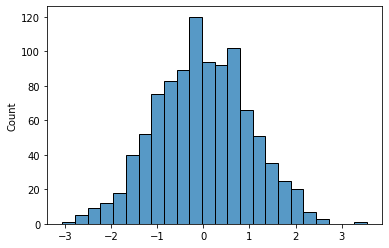

In [90]:
sns.histplot(x)

In [101]:
ks_1samp(x, norm.cdf, alternative = "two-sided")

KstestResult(statistic=0.02149908029997427, pvalue=0.7359658000435811)

Therefore, as **P-value is very high, we cannot reject null hypothesis**. Hence, we can say that our sample is approximately normally distributed

**Q.** Given Sachin's ODI record, find out whether there is a difference in the runs scored by Sachin based on the innings (1st or 2nd) with 90% confidence

**Ans:** We will use 2-sample KS test to check whether both distributions are same or not
<br> Ho => There is no difference in the distribution of runs in 1st and 2nd innings
<br> Ha => There is significant difference

In [5]:
sachin = pd.read_csv("Sachin_ODI.csv")
ks_2samp(sachin[sachin["Inns"] == 1]["runs"], sachin[sachin["Inns"] == 2]["runs"], alternative = "two-sided")

KstestResult(statistic=0.10990712074303406, pvalue=0.20868747831732348)

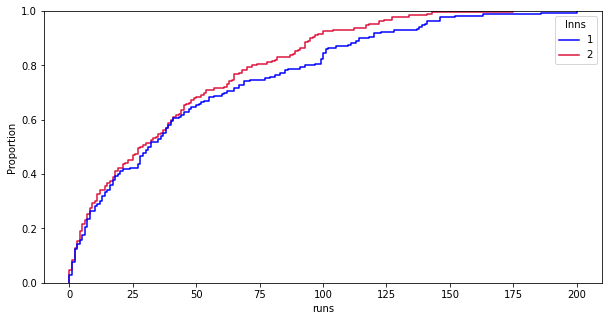

In [15]:
plt.figure(figsize = (10, 5))
sns.ecdfplot(data = sachin, x = "runs", hue = "Inns", palette = ["blue", "crimson"])
plt.show()

### <u>Chi Square Test</u>

In [198]:
print(chi2.ppf(0.05, df = 2).round(2)) #percent-point function 
print(chi2.cdf(0.1, df = 2).round(2))

0.1
0.05


**Q.** A random sample of 395 people was surveyed and each person was asked to report the highest education level they obtained. The data observed are summarized below:

Female(60, 54, 46, 41, 201), Male(40, 44, 53, 57, 194) and Total(100, 98, 99, 98, 395), where variables in each class are (High school, Bachelors, Masters, Ph.d, Total).

The expected values are: Female(50.866, 49.868, 50.377, 49.868, 201), Male(49.114, 48.132, 48.623, 48.132, 194) and Total(100, 98, 99, 98, 395).

Are gender and education levels dependent at a 5% significance level?

**Ans:** We will perform **chi2 test for independence** using contigency table
<br> Ho => variables are independent
<br> Ha => variables are dependent

In [56]:
contingency_table = [
    [60, 40], 
    [54, 44], 
    [46, 53], 
    [41, 57]   
]
alpha = 0.05

chi_stat, p_val, df, expected_vals = chi2_contingency(contingency_table)
print(chi_stat, p_val, df)
print(expected_vals)

if (p_val < alpha):
    print("Null Hyp rejected - Therefore, variables are dependent")
else:
    print("Null Hyp cannot be rejected - Therefore, variables might be independent")

8.006066246262538 0.045886500891747214 3
[[50.88607595 49.11392405]
 [49.86835443 48.13164557]
 [50.37721519 48.62278481]
 [49.86835443 48.13164557]]
Null Hyp rejected - Therefore, variables are dependent


**Q.** According to a survey conducted on car owners, it was determined that 60% of owners have only one car, 28% have two cars, and 12% have three or more cars. Suppose you conducted your own survey and found that 73 owners have only one car, 38 owners have two cars, and 18 owners have three or more cars. Determine whether your survey supports the original one, with a significance level of 0.05.

**Ans:**
<br>Ho => no difference between the two surveys [i.e our survey supports given survey --> from same dist]
<br>Ha => statistical difference between surveys
<br>actual = 73, 38, 18, Total = 129 
<br>expected = 0.60 * 129, 0.28 * 129, 0.12 * 129

In [131]:
# obs = [73/129, 38/129, 18/129]
# exp = [0.60, 0.28, 0.12]
obs = [73, 38, 18]
exp = [0.6 , 0.28, 0.12]
exp = [num*sum(obs) for num in exp]
alpha = 0.05

chi_stat, p_val = chisquare(obs, exp, axis = 0)

print("Expected array", exp)
print("Chi Stat:", round(chi_stat, 4))
print("P-Value:", round(p_val, 4))
if (p_val < alpha):
    print("Null Hyp rejected")
else:
    print("Null Hyp cannot be rejected")

Expected array [77.39999999999999, 36.120000000000005, 15.479999999999999]
Chi Stat: 0.7582
P-Value: 0.6845
Null Hyp cannot be rejected


In [200]:
1 - chi2.cdf(0.7582, df = 2) #always right tailed by default

0.6844771615276255

**Q.** Heart Failure v/s Alcohol Notebook Example

In [107]:
obs = pd.DataFrame(data = None, 
                   columns = ["Heart Failure", "No Heart Failure"])
obs

,Heart Failure,No Heart Failure


In [95]:
1 - chi2.cdf(10.197, df = 2)

0.006105898547634547

In [98]:
chi2.ppf(0.99, df = 2)

9.21034037197618

In [97]:
1 - chi2.cdf(9.21, df = 2)

0.010001702004705515

In [54]:
ct = pd.crosstab(index = ["Yes", "No"], columns = ["Abstain", "Drink"], 
            rownames = ["Heart_Fail"], colnames = ["Alcohol"])
ct.loc["Yes", "Abstain"] = 146
ct.loc["Yes", "Drink"] = 135
ct.loc["No", "Drink"] = 882
ct.loc["No", "Abstain"] = 750
ct

Alcohol,Abstain,Drink
Heart_Fail,,
No,750,882
Yes,146,135


In [90]:
obs = pd.DataFrame(data = [[146, 106, 29], [750, 590, 292]], columns = ["Abstain", "<7 drinks/week", ">=7 drinks/week"], 
                  index = ["Heart Fail - Yes", "Heart Fail - No"])
obs

,Abstain,<7 drinks/week,>=7 drinks/week
Heart Fail - Yes,146,106,29
Heart Fail - No,750,590,292


In [55]:
chi2_contingency(ct)

(3.230691743859433,
 0.0722701556177364,
 1,
 array([[764.38682697, 867.61317303],
        [131.61317303, 149.38682697]]))

### <u>ANNOVA</u>

Suppose there a four machines M1, M2, M3, and M4 in a factory that are used to produce a certain kind of cotton fabric
Samples of size 4 with each unit having 100sq. meters are selected from the output of the machine randomly, and the number of flaws in every 100 sq. meters are counted and listed below.
<div>
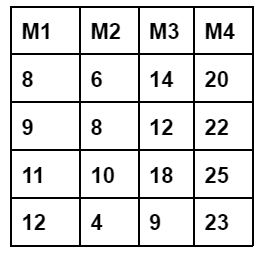
</div>
Do you think there is a significant difference in the performance of the four machines?

In [121]:
m1 = [8, 9, 11, 12]
m2 = [6, 8, 10, 4]
m3 = [14, 12, 18, 9]
m4 = [20, 22, 25, 23]
rows = 4
N = 16
dfn = rows-1
dfd = N-rows
 
# Conduct the one-way ANOVA
f_stat, p_val = f_oneway(m1, m2, m3, m4)
print(f_stat.round(5))
print(p_val.round(5))
print(f.ppf(0.95, dfn, dfd)) #assuming 5% LOS

25.22157
2e-05
3.490294819497605


A Company wishes to test whether three sales persons Saurav, Naveen, and Radha make the same sales or they differ in their selling ability as measured by the average size of their sales during the last week. Out of 14 sales 'Saurav' made 5, 'Naveen' made 4 and 'Radha' made 5. The following table describes the records of the sales persons in rupees.
<div>
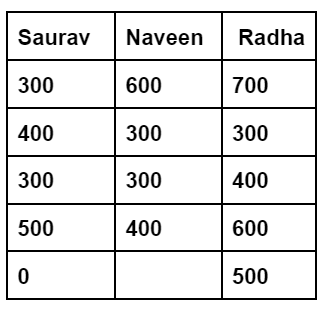
</div>
Test whether the average sales of the Saurav, Naveen, and Radha differ in size at a 95% confidence level

Note: [Solved Example](https://study.com/skill/learn/how-to-calculate-the-total-sum-of-squares-within-and-between-ssw-and-ssb-explanation.html#:~:text=Step%201%3A%20For%20each%20group,data%20points%20regardless%20of%20group)

In [134]:
Saurav = [300, 400, 300, 500, 0]
Naveen = [600, 300, 300, 400, np.nan]
Radha = [700, 300, 400, 600, 500]

vals = list(zip(Saurav, Naveen, Radha))
sales_df = pd.DataFrame(data = vals, columns = ["Saurav", "Naveen", "Radha"])
sales_df

,Saurav,Naveen,Radha
0,300,600.0,700
1,400,300.0,300
2,300,300.0,400
3,500,400.0,600
4,0,NaN,500


In [172]:
num_s = sales_df["Saurav"].count()
num_n = sales_df["Naveen"].count() #Ignores null values
num_r = sales_df["Radha"].count()

groups = len(sales_df.columns)
total_elements = num_s + num_n + num_r

mean_s = sales_df["Saurav"].mean()
mean_n = sales_df["Naveen"].mean()
mean_r = sales_df["Radha"].mean()
mean_overall = (mean_s + mean_n + mean_r)/3

var_s = sales_df["Saurav"].var()
var_n = sales_df["Naveen"].var()
var_r = sales_df["Radha"].var()

SSB = num_s*(mean_overall - mean_s)**2 + \
      num_n*(mean_overall - mean_n)**2 + \
      num_r*(mean_overall - mean_r)**2 


SSW = (num_s-1)*var_s + \
      (num_n-1)*var_n + \
      (num_r-1)*var_r


dof_ssb = groups - 1
dof_ssw = total_elements - groups


f_stat = (SSB/dof_ssb) / (SSW/dof_ssw)

print('Sum of Squares Between Groups: {0:.6g}'.format(SSB))
print('Sum of Squares Within Groups: {0:.9g}'.format(SSW))
print('Degrees of Freedom for SSB: {}'.format(dof_ssb))
print('Degrees of Freedom for SSW: {}'.format(dof_ssw))
print('F-Statistic: {0:.6g}'.format(f_stat))

Sum of Squares Between Groups: 100000
Sum of Squares Within Groups: 300000
Degrees of Freedom for SSB: 2
Degrees of Freedom for SSW: 11
F-Statistic: 1.83333


In [152]:
Saurav = [300, 400, 300, 500, 0]
Naveen = [600, 300, 300, 400]
Radha = [700, 300, 400, 600, 500]
rows = 5
N = 14
dfn = rows-1
dfd = N-rows
alpha = 0.05

f_stat, p_val = f_oneway(Saurav, Naveen, Radha)
print(f_stat.round(5))
print(p_val.round(5))
print(f.ppf(0.95, dfn, dfd)) #assuming 5% LOS

if(p_val < alpha):
    print('Reject Null - Means are different')
else:
    print('Fail to reject Null - Means are same')

1.83333
0.20551
3.6330885114190794
Fail to reject Null - Means are same


<h3><u> Kruskal Wallis Test</u> (Non-paramteric ANOVA)</h3> 

**IMP: Kruskal Wallis is not a test for medians. We can only compare medians if the sample distributions are similar(size, location, variance). Below is an example**

[Note: KW Test in detail](https://towardsdatascience.com/kruskal-wallis-test-for-beginners-4fe9b0333b31)

**Q.**  In the loan.csv dataset, we wish to test the hypothesis that among all loan applicants who were **rejected for a loan**, the **applicant income** of the people with a **credit history of 1** is significantly different from the **applicant income** of the people with a **credit history of 0**.

**Ans:** Since, data is not normally distributed, we can't perform student's T-test. Therefore, we must use the KW test instead.
<br> From our result, we can say that applicant income for people who haven't got a loan is similar irrespective of their credit history

In [187]:
data = pd.read_csv("loan.csv")
data = data[data["Loan_Status"] == "N"]
group1 = data[data["Credit_History"] == 0]["ApplicantIncome"]
group2 = data[data["Credit_History"] == 1]["ApplicantIncome"]

In [186]:
from scipy.stats import shapiro #Test to check if samples are from normal distribution -- Ho => Normal dist
print(shapiro(group1)[1])
print(shapiro(group2)[1])

4.554005639283129e-18
3.2996619759445567e-13


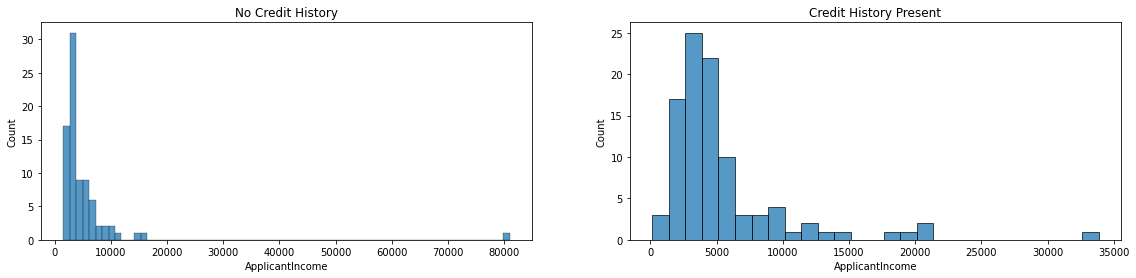

In [189]:
fig, axs = plt.subplots(1, 2, figsize = (8, 4))
sns.histplot(group1, ax = axs[0]).set(title = "No Credit History")
sns.histplot(group2, ax = axs[1]).set(title = "Credit History Present")
fig.subplots_adjust(right = 2)
plt.show()

In [188]:
from scipy.stats import kruskal
stat, p_val = kruskal(group1, group2, nan_policy = "omit") #doesn't consider nan values

print("Kruskal P-val:", p_val)
if(p_val < 0.05):
    print("Medians are different, reject Null Hyp")
else:
    print("Medians are similar, fail to reject Null")

Kruskal P-val: 0.15224584555807225
Medians are similar, fail to reject Null


### <u> Levene's Test </u>

**Q.** In the loan.csv dataset, we wish to test the hypothesis that the loan amount payable per year is different for women and unmarried men. 
1. To do so, first define a new feature called 'Loan_Amount_per_year' using the formula 'LoanAmount' / 'Loan_Amount_Term'. 
2. Next, define group1 as the women loan applicants, and group2 as the unmarried male applicants. 
3. Print out their variances. 
4. Perform a Levene test using the median as the center to check whether the variances of the two groups are significantly different.
5. Next, apply the t-test to check whether the average loan amount payable is significantly different for the two groups. What interpretations can be drawn from the tests conducted?

### <u> Correlation and Covariance </u>

In [40]:
hdi_df = pd.read_csv("human_development.csv")
hdi_df = hdi_df.drop(hdi_df.columns[[4, 5, 7]], axis = 1)
hdi_df.columns = ["hdi_rank", "country", "hdi_score", "life_ex", "gni_pc"]
hdi_df['gni_pc'] = hdi_df['gni_pc'].str.replace(',', '').astype(float)/1000
hdi_g20_df = hdi_df[hdi_df["country"].isin(["Argentina", "Australia", "Brazil", "Canada", "China", "France", "Germany", 
                                            "India", "Indonesia", "Italy", "South Korea", "Japan", "Mexico", 
                                            "Russian Federation", "Saudi Arabia", "South Africa", "Turkey", 
                                            "United Kingdom", "United States","European Union"])]
hdi_g20_df

,hdi_rank,country,hdi_score,life_ex,gni_pc
1,2.0,Australia,0.935,82.4,42.261
5,6.0,Germany,0.916,80.9,43.919
7,8.0,United States,0.915,79.1,52.947
8,9.0,Canada,0.913,82.0,42.155
14,14.0,United Kingdom,0.907,80.7,39.267
16,17.0,South Korea,0.898,81.9,33.890
19,20.0,Japan,0.891,83.5,36.927
21,22.0,France,0.888,82.2,38.056
26,27.0,Italy,0.873,83.1,33.030
38,39.0,Saudi Arabia,0.837,74.3,52.821


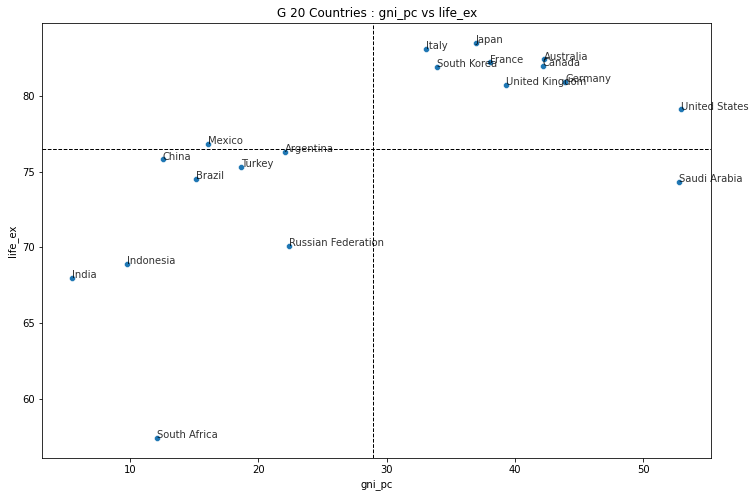

In [42]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = hdi_g20_df, x = 'gni_pc', y = 'life_ex')
plt.title(f"G 20 Countries : {'gni_pc'} vs {'life_ex'}")
plt.xlabel('gni_pc')
plt.ylabel('life_ex')
          
for i in range(hdi_g20_df.shape[0]):
          plt.text(hdi_g20_df.gni_pc.iloc[i], y=hdi_g20_df.life_ex.iloc[i], s=hdi_g20_df.country.iloc[i], alpha=0.8)

# Benchmark Mean values          
plt.axhline(y = hdi_g20_df.life_ex.mean(), color='k', linestyle='--', linewidth=1)           
plt.axvline(x = hdi_g20_df.gni_pc.mean(), color='k',linestyle='--', linewidth=1) 
plt.show()

In [44]:
print(np.cov(hdi_g20_df.life_ex, hdi_g20_df.gni_pc))
print(hdi_g20_df.life_ex.var(), hdi_g20_df.gni_pc.var())

[[ 44.98362573  66.05931667]
 [ 66.05931667 224.30467778]]
44.98362573099416 224.30467777777778


In [49]:
def spearman_corr(x, y):
    srcc_val = 0.0
    order = np.argsort(x)
    ranks = np.argsort(order)
    a1 = ranks + 1
    order = np.argsort(y)
    ranks = np.argsort(order)
    a2 = ranks + 1
    
    n = len(a1)
    a1_sq = a1 ** 2
    a2_sq = a2 ** 2
    mult = a1 * a2
    num = (n * sum(mult)) - (sum(a1) * sum(a2))
    denom = np.sqrt(((n * sum(a1_sq)) - (sum(a1) ** 2)) *((n * sum(a2_sq)) - (sum(a2) ** 2)))
    
#     num = np.cov(a1, a2)
#     denom = np.std(a1) * np.std(a2)

    srcc_val = num/denom
    return srcc_val.round(3)

<h3><u> Misc/Testing </u></h3>

In [8]:
x = 48
mean = 50
std = 2
norm.cdf((x - mean)/std)

0.7535533517801833

In [21]:
zscore = norm.ppf(0.025)
zscore

-1.9599639845400545

In [55]:
print(t.ppf(0.01, 30))
print(t.ppf(0.01, 1000))
print(norm.ppf(0.01))

-2.4572615424005706
-2.33008267475551
-2.3263478740408408


In [58]:
t.cdf(-4.22, 9)

0.001119724779430328

In [60]:
norm.cdf(2.31)

0.989555922938049

In [27]:
poisson.pmf(k=0, mu = 3)

0.049787068367863944

In [29]:
'''
Based on a recent survey, it was found that there were 30% negative responses, and 70% positive. 
Estimate the number of feedbacks to expect before negative feedback appears when we pick one response after another randomly.
'''
# E(X)= np
# E(X) = expected value
# n = num of trials
# p = probability of success
# E(X) = n / p

1 / 0.3

# Need more clarity

3.3333333333333335

In [145]:
sachin["runs"].describe()

count    360.000000
mean      43.241667
std       42.182452
min        0.000000
25%        8.000000
50%       30.000000
75%       67.000000
max      200.000000
Name: runs, dtype: float64

<AxesSubplot:xlabel='runs', ylabel='Count'>

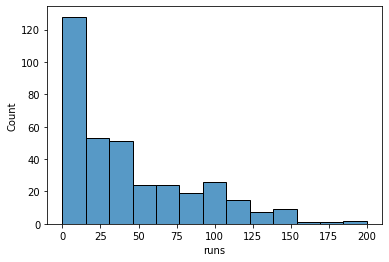

In [146]:
import seaborn as sns
sns.histplot(data = sachin, x = "runs")

In [44]:
from scipy.stats import binom

round(binom.pmf(n = 40, k = 20, p = 0.45), 5)

0.10254

In [45]:
from scipy.stats import expon

expon.cdf(x = 4, scale = 12)

0.28346868942621073

In [ ]:
data = pd.read_csv("C:\Users\Mrudul\Scaler\Aerofit Treadmill Business Case\aerofit")

In [74]:
1 - norm.cdf(1.96)

0.024997895148220484

In [109]:
dictionary = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e' : 5}
print(list(map(lambda x : x * x, dictionary.values())))

[1, 4, 9, 16, 25]


In [110]:
x = "abcdef"
i = "a"
while i in x:
    x = x[:-1]
    print(i, end = " ")

a a a a a a 

In [111]:
wt_before=[85, 74, 63.5, 69.4, 71.6, 65,90,78]
wt_after=[82, 71, 64, 65.2, 67.8, 64.7,95,77]

tot = 0
for i in range(len(wt_before)):
    tot += wt_before[i] - wt_after[i]
    
tot

9.799999999999997

<center><b>--------------- Important Links are posted above ----------------<b></center>

<h3><u> Module Test </u></h3>

In [39]:
IQ_before=[101, 124, 89, 57, 135, 98, 69, 105, 114, 106, 97, 121, 93, 116, 102, 71, 88, 108, 144, 99]
IQ_after=[113, 127, 89, 70, 127, 104, 69, 127, 115, 99, 104, 120, 95, 129, 106, 71, 94, 112, 154, 96]
alpha = 0.1

t_stat, p_val = ttest_rel(IQ_before, IQ_after, alternative = "less")

print("T-Score:", round(t_stat, 4))
print("P-Value:", round(p_val, 4))

if (p_val < alpha):
    print("Null Hyp rejected")
else:
    print("Fail to reject Null")

T-Score: -2.5849
P-Value: 0.0091
Null Hyp rejected


Null hyp => **u <= 5**
<br> Alt Hyp => **u > 5**

In [45]:
alpha = 0.05
mu_pop = 5
mu_sample = 4.78
n_sample = 35
std_dev = 1.8

z = (mu_sample - mu_pop) / (std_dev/math.sqrt(n_sample))
p = 1 - norm.cdf(z)

print("z-score:", round(z, 4))
print("p-value:", round(p, 4))

if (p < alpha):
    print("Null Hyp rejected")
else:
    print("Null Hyp cannot be rejected")

z-score: -0.7231
p-value: 0.7652
Null Hyp cannot be rejected


In [47]:
1 - norm.cdf(-0.12)

0.5477584260205839

In [ ]:
alpha = 0.05
mu_pop = 1.7
mu_sample = 1.85
n_sample = 60
std_dev = 0.5

z = (mu_sample - mu_pop) / (std_dev/math.sqrt(n_sample))
p = norm.cdf(z)

print("z-score:", round(z, 4))
print("p-value:", round(p, 4))

if (p < alpha):
    print("Null Hyp rejected")
else:
    print("Null Hyp cannot be rejected")

In [31]:
alpha = 0.05
mu_pop = 1.7
mu_sample = 1.85
n_sample = 60
std_dev = 0.5

z = (mu_sample - mu_pop) / (std_dev/math.sqrt(n_sample))
p = norm.cdf(z)

print("z-score:", round(z, 4))
print("p-value:", round(p, 4))

if (p < alpha):
    print("Null Hyp rejected")
else:
    print("Null Hyp cannot be rejected")

z-score: 2.3238
p-value: 0.9899
Null Hyp cannot be rejected


In [29]:
val = 180.23/8.159
1 - f.cdf(22.089, 1, 1)

0.13346380416623393

In [59]:
binom.ppf(0.05, 12, 0.5)

3.0

In [57]:
binom.cdf(n = 12, k = 3, p = 0.5)

0.072998046875

In [34]:
alpha = 0.01
mu_pop = 20
mu_sample = 23
n_sample = 25
std_dev = 7

z = (mu_sample - mu_pop) / (std_dev/math.sqrt(n_sample))
p = 1 - t.cdf(z, n_sample - 1)

print("z-score:", round(z, 4))
print("p-value:", round(p, 4))

if (p < alpha):
    print("Null Hyp rejected")
else:
    print("Null Hyp cannot be rejected")

z-score: 2.1429
p-value: 0.0212
Null Hyp cannot be rejected


In [35]:
23.5/(3*0.67)

11.691542288557212

In [36]:
11.691542288557212 ** 2

136.6921610851216

In [6]:
p = 0.4096
binom.ppf(n = 5, p = 0.4096, k = 2)

TypeError: ppf() missing 1 required positional argument: 'q'

In [7]:
binom.sf(k = 1, n = 5, p = 0.4096)

0.67942767016171

In [8]:
binom.sf(k = 2, n = 5, p = 0.048)

0.001027822583808

In [9]:
1 - poisson.pmf(k = 0, mu = 1)

0.6321205588285577

In [10]:
83/0.2

415.0